In [78]:
import math
import matplotlib.pyplot as plt 
import numpy as np
# definig 1st function
def f(x,y):
    return math.sin(x) + x**2
# defining 2nd function
def ff(x,y):
    return y - x**2 + 1

# Solving a differential equation by Euler method

In [79]:
# solving a differential equation 
# forwad euler method
def Euler_f(f, x0, y0, h, n):
    """Solve the differential equation by euler forward method y'=f(x,y) with initial condition y(x0) = y0

    Args:
        f (func): the given function f(x,y)
        x0 (float): the initial value of x
        y0 (float): the initial value of y
        h (float): the step size
        n (int): the number of steps

    Returns:
        x (float), y(float): the final value of x and y
    """
    # initialize x and y
    x = x0
    y = y0
    # create a list to store the values of x and y
    a = []
    b = []
    # main loop
    for i in range(n):
        y = y + h * f(x, y)
        a.append(y)
        x = x + h
        b.append(x)
        plt.plot(b, a)
    return x,y

The solution is  (1.0000000000000007, 0.783836508387319)


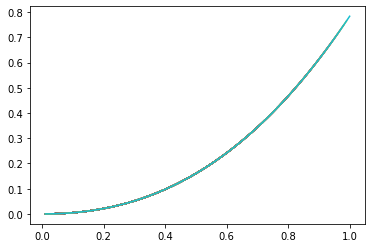

In [80]:
print("The solution is ", Euler_f(f, 0, 0, 0.01, 100))

The solution is  (1.0000000000000007, 6.687765691127309)


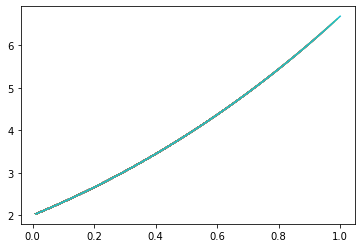

In [81]:
print("The solution is ", Euler_f(ff, 0, 2, 0.01,100))
# x^2 + 2x +e^x + 1 = y

In [82]:
# Backward Euler Method
## Warning: this method may not be correct ; need to proof read
def Euler_b(f, x0, y0, h, n):
    """Solve the differential equation by euler backward method y'=f(x,y) with initial condition y(x0) = y0

    Args:
        f (func): the given function f(x,y)
        x0 (float): the initial value of x
        y0 (float): the initial value of y
        h (float): the step size
        n (int): the number of steps

    Returns:
        x (float), y(float): the final value of x and y
    """
    # initialize x and y
    x = x0
    y = y0
    # create a list to store the values of x and y
    a = []
    b = []
    # main loop
    for i in range(n):
        y = y / (1 - h)
        a.append(y)
        x = x + h
        b.append(x)
        plt.plot(b, a)
    return x,y

The solution is  (1.0000000000000007, 0.0)


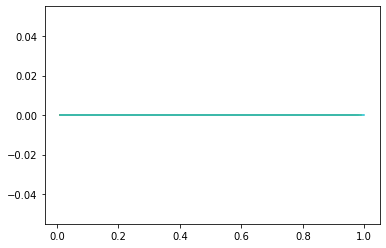

In [83]:
print("The solution is ", Euler_b(f, 0, 0, 0.01, 100))

# Solving the differential equation by Predictor-Corrector method

In [84]:
# corrector method
def predictor_corrector(f, x0, y0, h, n):
    # initialize x and y
    x = x0
    y = y0
    # create a list to store the values of x and y
    a = []
    b = []
    # calculate k1
    for i in range(n):
        k1 = h * f(x, y)
        # calculate k2
        k2 = h * f(x + h, y + k1)
        # calculate y
        y = y + (k1 + k2) / 2
        a.append(y)
        x = x + h
        b.append(x)
        plt.plot(b, a) 
    return x,y

The solution of the differential eqn is (1.0000000000000007, 0.7930438633113587)


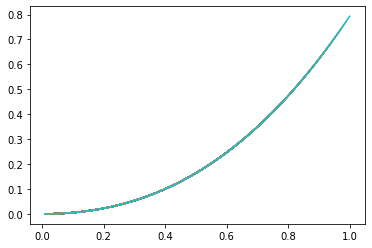

In [85]:
print("The solution of the differential eqn is",predictor_corrector(f, 0, 0, 0.01, 100))

# Solving the differential equation by Runge-Kutta method

In [86]:
# 4th order Runge-Kutta method for solving differential eqn
def range_kutta_fourth(f, x0, y0, h, n):
    # initialize x and y
    x = x0
    y = y0
    # create a list to store the values of x and y
    a = []
    b = []
    # calculate k1
    for i in range(n):
        k1 = h * f(x, y)
        # calculate k2
        k2 = h * f(x + h / 2, y + k1 / 2)
        # calculate k3
        k3 = h * f(x + h / 2, y + k2 / 2)
        # calculate k4
        k4 = h * f(x + h, y + k3)
        # calculate y
        y = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        a.append(y)
        x = x + h
        b.append(x)
        plt.plot(b, a)
    return x,y
    

(5.0, 184.01016570302892)

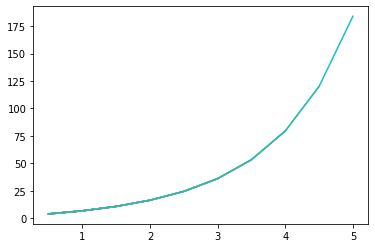

In [87]:
range_kutta_fourth(ff, 0, 2, 0.5, 10)

# Solve coupled differential equations by 4th order Runge-Kutta method

In [88]:
def CODE2(t0,x,y,z,func1,func2,func3,h,t): 
    
    T=[]
    X=[]
    Y=[]
    Z=[]
    k1x=k2x=k3x=k4x=0
    k1y=k2y=k3y=k4y=0
    k1z=k2z=k3z=k4z=0
    
    while t0<t+h:
        
        T.append(t0)
        X.append(x)
        Y.append(y)
        Z.append(z) 
        
        k1x = h*func1(x,y,z,t0)
        k1y = h*func2(x,y,z,t0)
        k1z = h*func3(x,y,z,t0)
        
        k2x = h*func1(x+k1x/2,y+k1y/2,z+k1z/2,t0+h/2)
        k2y = h*func2(x+k1x/2,y+k1y/2,z+k1z/2,t0+h/2)
        k2z = h*func3(x+k1x/2,y+k1y/2,z+k1z/2,t0+h/2)
        
        k3x = h*func1(x+k2x/2,y+k2y/2,z+k2z/2,t0+h/2)
        k3y = h*func2(x+k2x/2,y+k2y/2,z+k2z/2,t0+h/2)
        k3z = h*func3(x+k2x/2,y+k2y/2,z+k2z/2,t0+h/2)
     
        k4x = h*func1(x+k3x,y+k3y,z+k3z,t0+h)
        k4y = h*func2(x+k3x,y+k3y,z+k3z,t0+h)
        k4z = h*func3(x+k3x,y+k3y,z+k3z,t0+h)
        
        x += (k1x+2*k2x+2*k3x+k4x)/6
        y += (k1y+2*k2y+2*k3y+k4y)/6
        z += (k1z+2*k2z+2*k3z+k4z)/6
        t0 = t0+h
    
    print("Solution at t=",t, ", are: x=", x,", y =",y,", z =",z)      
    return X,Y,Z,T

In [89]:
def fcx(x,y,z,t):
    return 10*(y-x)

def fcy(x,y,z,t):
    return x*(28-z)-y

def fcz(x,y,z,t):
    return x*y-8*z/3


X,Y,Z,T = CODE2(0,1,0,0,fcx,fcy,fcz,0.01,50)

Solution at t= 50 , are: x= -0.998005351338609 , y = -1.7607473138519043 , z = 13.330477814367365


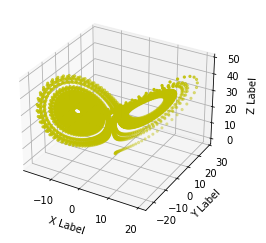

In [90]:
# ploting the 3d graph
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, Y, Z, c='y',marker='.')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Boundary value problem : Shooting method

In [91]:
def CODE1(t0,x,y,func1,func2,h,t): 
    
    A = []
    B = []
    C = []
    k1x = k2x = k3x = k4x = 0
    k1y = k2y = k3y = k4y = 0
    #k1z=k2z=k3z=k4z=0
    A.append(t0)
    B.append(x)
    C.append(y) 
    
    while t0<t+h:
          
        k1x=h*func1(x,y,t0)
        k1y=h*func2(x,y,t0)
        #k1z=h*func(y,t0)
        
        k2x=h*func1(x+k1x/2,y+k1y/2,t0+h/2)
        k2y=h*func2(x+k1x/2,y+k1y/2,t0+h/2)
        #k2z=h*func(y+k1z/2,t0+h/2)
        
        k3x=h*func1(x+k2x/2,y+k2y/2,t0+h/2)
        k3y=h*func2(x+k2x/2,y+k2y/2,t0+h/2)
        #k3z=h*func(y+k2z/2,t0+h/2)
          
        k4x=h*func1(x+k3x,y+k3y,t0+h)
        k4y=h*func2(x+k3x,y+k3y,t0+h)
        #k4z=h*func(y+k3z,t0+h)
        
        x+= (k1x+2*k2x+2*k3x+k4x)/6
        y+= (k1y+2*k2y+2*k3y+k4y)/6
        #z+= (k1z+2*k2z+2*k3z+k4z)/6
        t0=t0+h
        
        A.append(t0)
        B.append(x)
        C.append(y) 
    
    print("Solution at t=",t, ", are: x=", x,", y =",y)      
    return B,C,A

In [92]:
def shoot(x0,xn,y0,func1,func2,z,h):
    
    X,Y,Z=CODE1(x0,z,y0,func1,func2,h,xn)
    return Y[-1]


def bound(x0,xn,y0,yn,func1,func2,z1,z2,h,e):
   
   R=0
   k1=shoot(x0,xn,y0,func1,func2,z1,h)
   k2=shoot(x0,xn,y0,func1,func2,z2,h)
   t=z1+(z2-z1)*(yn-k1)/(k2-k1)
   j=shoot(x0,xn,y0,func1,func2,t,h)
   
   while abs(j-yn)>e:
     
     R=R+1
     if j<yn:z1=t
     else: z2=t
    
     k1=shoot(x0,xn,y0,func1,func2,z1,h)
     k2=shoot(x0,xn,y0,func1,func2,z2,h)
     t=z1+(z2-z1)*(yn-k1)/(k2-k1)
     j=shoot(x0,xn,y0,func1,func2,t,h)
    
   print("z(0) =",t,", Iterations:",R)

In [93]:
def fx(y,z,t):
    return y

def fy(y,z,t):
    return 2*y

def fl(x):
    return 0.157*np.exp(1.414*x)+ 1.043*np.exp(-1.414*x)

In [94]:
#Plotter   
def Plotter(A,B,func):
       
    f = plt.figure()
    z = np.arange(A[0],A[-1],0.0001)
    plt.plot(z, func(z),color='blue')
    plt.plot(A,B, color='green')
    plt.show()

Solution at t= 1 , are: x= -1.6600569338890296 , y = -1.1201138677780598
Solution at t= 1 , are: x= 1.6600569338890296 , y = 3.5201138677780595
Solution at t= 1 , are: x= -0.21465199923297412 , y = 0.9000000000000001
z(0) = -0.06465199923297421 , Iterations: 0
Solution at t= 1 , are: x= 3.984086325900587 , y = 5.508172651801174


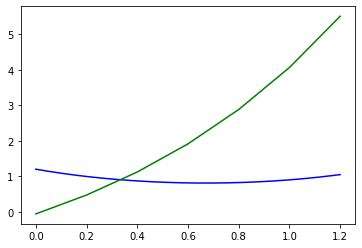

In [96]:
bound(0,1,1.2,0.9,fx,fy,-0.5,0.5,0.1,0.1)

X,V,T=CODE1(0,1.2,-0.06,fx,fy,0.2,1)
Plotter(T,V,fl)